<a href="https://colab.research.google.com/github/ifky06/PCVK/blob/main/Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ahmad Rifki Fauzi**
# **TI-3B/04**

In [ ]:
import cv2 as cv
from skimage import io
from google.colab.patches import cv2_imshow #for image display
import matplotlib.pylab as plt
import numpy as np

### 1. Gamma Correction pada Citra

Gamma Correction pada Citra
---------------------------
Masukkan nilai gamma: 4


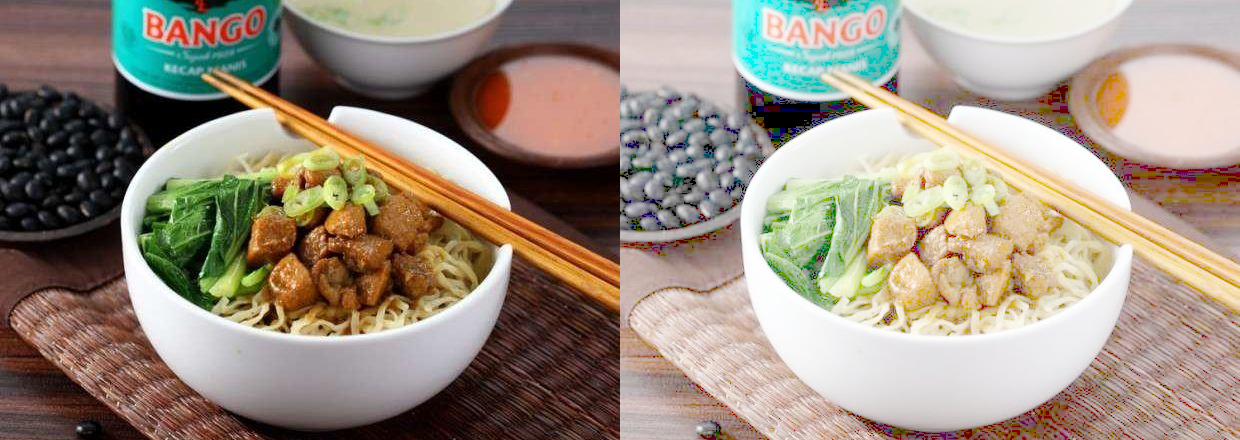

In [ ]:
print("Gamma Correction pada Citra")
print("---------------------------")

try:
    gamma = float(input("Masukkan nilai gamma: "))
except ValueError:
    print("Error, not a number")

img = io.imread('picture.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gamma_corrected = ((img / 255) ** (1 / gamma)) * 255
gamma_corrected = np.array(gamma_corrected, dtype = np.uint8)

final_frame = cv.hconcat((img, gamma_corrected))
cv2_imshow(final_frame)

### 2. buat simulasi image depth

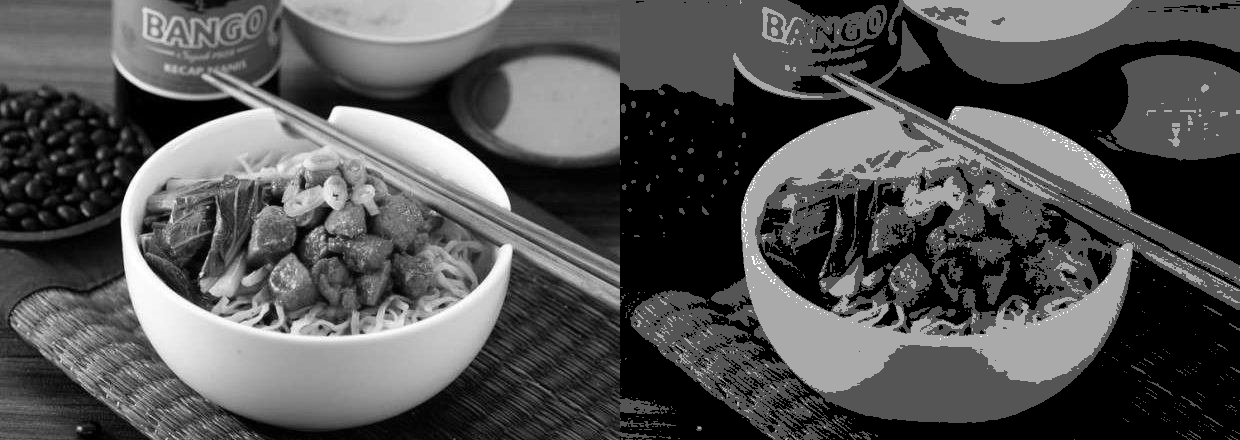

In [ ]:
bit_depth = 2
levels = 255 / (pow(2,bit_depth)-1)
original = cv.imread('picture.jpg', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i,j] = int(original[i,j]/levels)*levels

final_frame = cv.hconcat((original, depth_image))

cv2_imshow(final_frame)

### 3. Buat modul average denoising

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


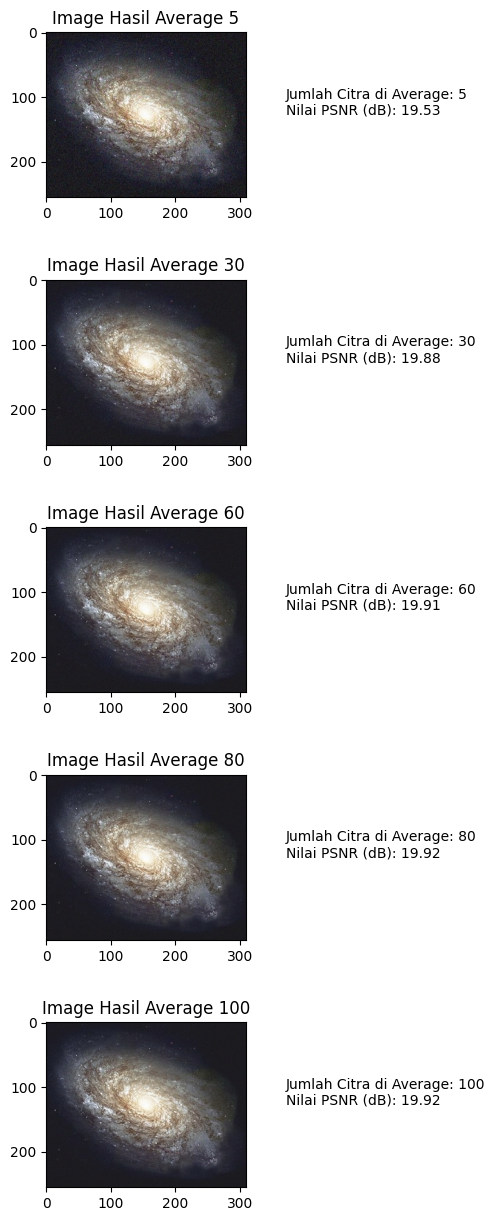

In [ ]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
import glob
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Fungsi untuk denoising rata-rata
def average_denoising(image_list):
    # Menghitung rata-rata citra-citra dengan Gaussian Noise
    average_image = np.zeros(image_list[0].shape, dtype=np.float32)
    for img in image_list:
        average_image += img / len(image_list)

    # Mengkonversi citra rata-rata ke tipe data yang benar
    average_image = average_image.astype(np.uint8)

    return average_image

# Menyiapkan tabel hasil PSNR dan citra hasil average
hasil_psnr = []

# Jumlah citra di Average Image
jumlah_citra_average_image = [5, 30, 60, 80, 100]

# Mencatat hasil PSNR dan citra hasil average
for jumlah_citra in jumlah_citra_average_image:
    # Memilih citra-citra dari cv_img sesuai jumlah_citra
    selected_images = cv_img[:jumlah_citra]

    # Menghilangkan noise dari citra-citra dengan Gaussian Noise
    denoised_image = average_denoising(selected_images)

    # Menghitung PSNR antara citra asli dan citra denoised
    psnr_value = peak_signal_noise_ratio(original_image, denoised_image)

    # Menambahkan hasil PSNR dan citra hasil average ke tabel
    hasil_psnr.append((jumlah_citra, psnr_value, denoised_image))

# Menampilkan tabel hasil PSNR dan citra hasil average dengan border
plt.figure(figsize=(10, 15))  # Increase figsize
for i, (jumlah_citra, psnr_value, avg_image) in enumerate(hasil_psnr):
    plt.subplot(len(hasil_psnr), 2, i * 2 + 1)  # 2 columns for image and info
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title(f'Image Hasil Average {jumlah_citra}')

    # Menampilkan informasi di sebelah kanan gambar
    info_text = f'Jumlah Citra di Average: {jumlah_citra}\nNilai PSNR (dB): {psnr_value:.2f}'
    plt.text(1.2, 0.5, info_text, fontsize=10, ha='left', transform=plt.gca().transAxes)

    # Add some space between images
    plt.subplots_adjust(hspace=0.5)

plt.show()

### 4. image masking

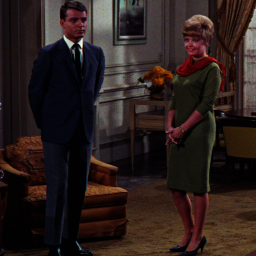

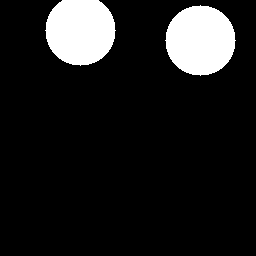

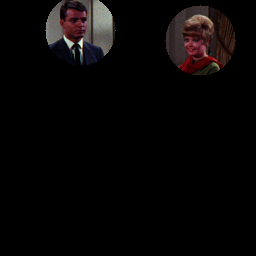

In [ ]:
# Baca gambar sumber
image = cv.imread('img.png')



mask = np.zeros(image.shape[:2], dtype="uint8")
cv.circle(mask, (80, 30), 35, 255, -1)
cv.circle(mask, (200, 40), 35, 255, -1)
masked = cv.bitwise_and(image, image, mask=mask)

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(masked)


### 5.  percobaan menggunakan operator lain

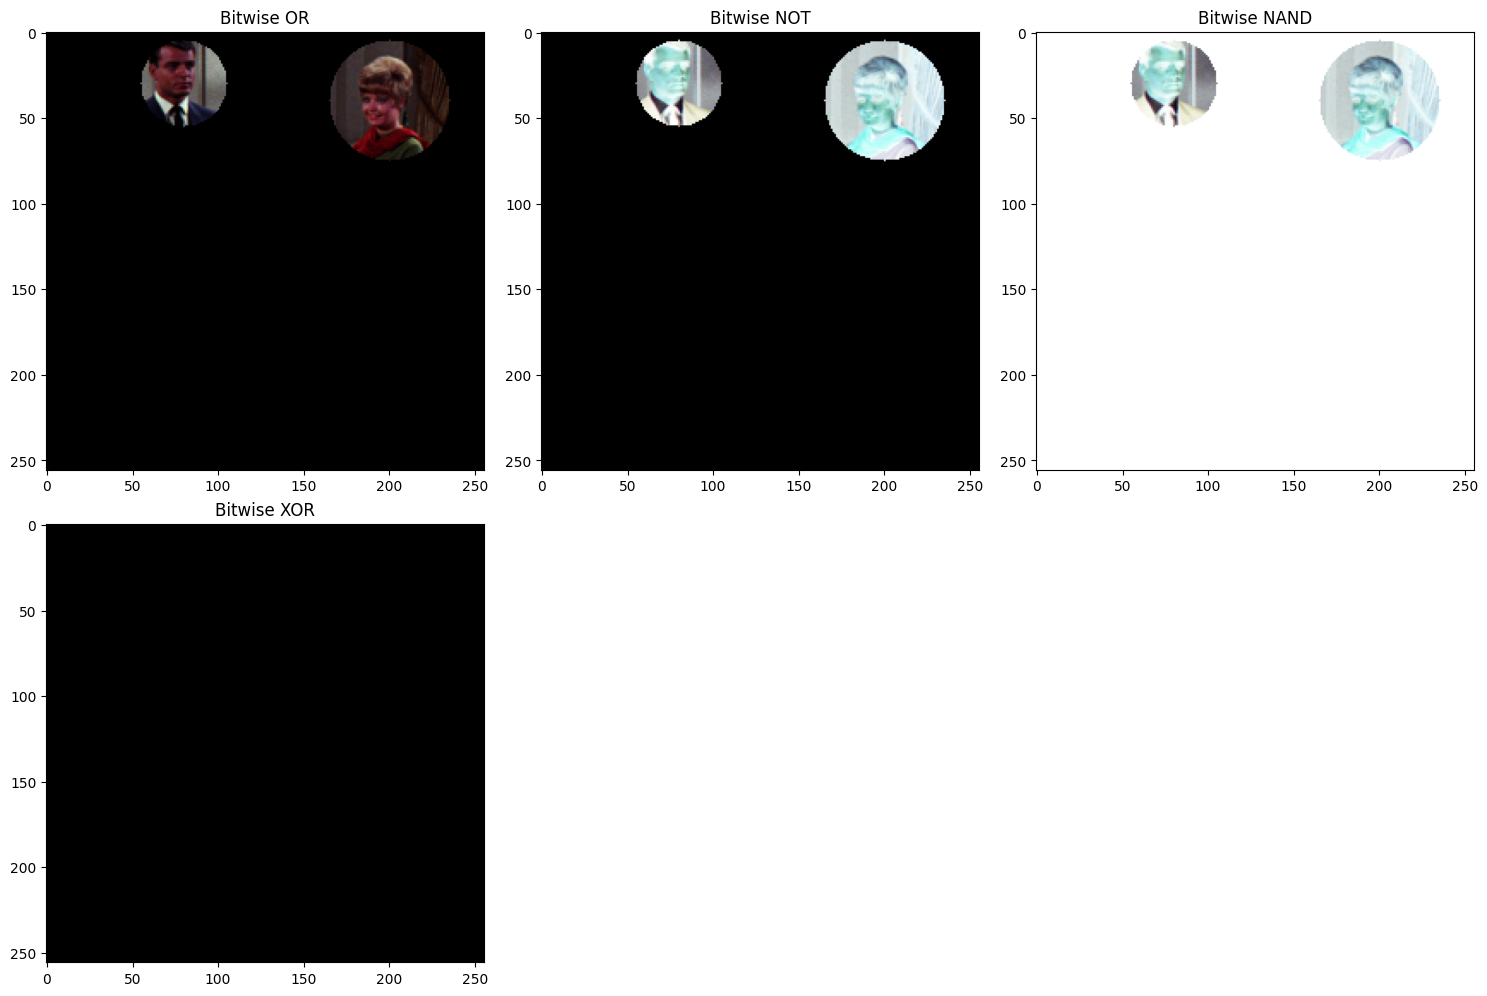

In [ ]:
original_image = cv.imread('img.png')

mask = np.zeros(image.shape[:2], dtype="uint8")
cv.circle(mask, (80, 30), 25, 255, -1)
cv.circle(mask, (200, 40), 35, 255, -1)
masked = cv.bitwise_xor(image, image, mask=mask)

# Menggunakan operasi bitwise AND untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Operasi bitwise OR
bitwise_or = cv.bitwise_or(original_image, original_image, mask=mask)

# Operasi bitwise NOT
bitwise_not = cv.bitwise_not(original_image, mask=mask)

# Operasi bitwise NAND
bitwise_nand = cv.bitwise_not(cv.bitwise_and(original_image, original_image, mask=mask))

# Operasi bitwise XOR
bitwise_xor = cv.bitwise_xor(original_image, original_image, mask=mask)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 10))

# Operasi bitwise OR
plt.subplot(231)
plt.imshow(cv.cvtColor(bitwise_or, cv.COLOR_BGR2RGB))
plt.title('Bitwise OR')
plt.axis('on')

# Operasi bitwise NOT
plt.subplot(232)
plt.imshow(cv.cvtColor(bitwise_not, cv.COLOR_BGR2RGB))
plt.title('Bitwise NOT')
plt.axis('on')

# Operasi bitwise NAND
plt.subplot(233)
plt.imshow(cv.cvtColor(bitwise_nand, cv.COLOR_BGR2RGB))
plt.title('Bitwise NAND')
plt.axis('on')

# Operasi bitwise XOR
plt.subplot(234)
plt.imshow(cv.cvtColor(bitwise_xor, cv.COLOR_BGR2RGB))
plt.title('Bitwise XOR')
plt.axis('on')

plt.tight_layout()
plt.show()
